In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('/kaggle/input/petrol-consumption/petrol_consumption.csv')

In [156]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [157]:
df.shape

(48, 5)

In [158]:
X = df.drop(['Petrol_Consumption'], axis = 1)
y = df['Petrol_Consumption']

In [159]:
X.shape

(48, 4)

In [160]:
y.shape

(48,)

#### Plotting Decision Tree without using any external tool for Optimization such as Grid Search CV

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

#### Decision Tree algorithm for regression.

In [162]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4,max_features=4)

tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

In [163]:
predictions = tree.predict(X_test)

In [164]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
18,865,709.0
13,508,709.0
26,577,585.0
31,554,709.0
10,580,428.0


We see that the predictions are not accurate. Let's evaluate the prediction accuracy.

In [165]:
# Evaluating the Prediction Accuracy
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 106.73333333333333
Mean Squared Error: 18466.321333333333
Root Mean Squared Error: 135.89084344919394
r2_score: 0.20106927964521037


In [166]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=X.columns).sort_values(ascending=False)

Petrol_tax                      0.340189
Average_income                  0.286073
Paved_Highways                  0.202804
Population_Driver_licence(%)    0.170934
dtype: float64

In [167]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X.columns, out_file=None)

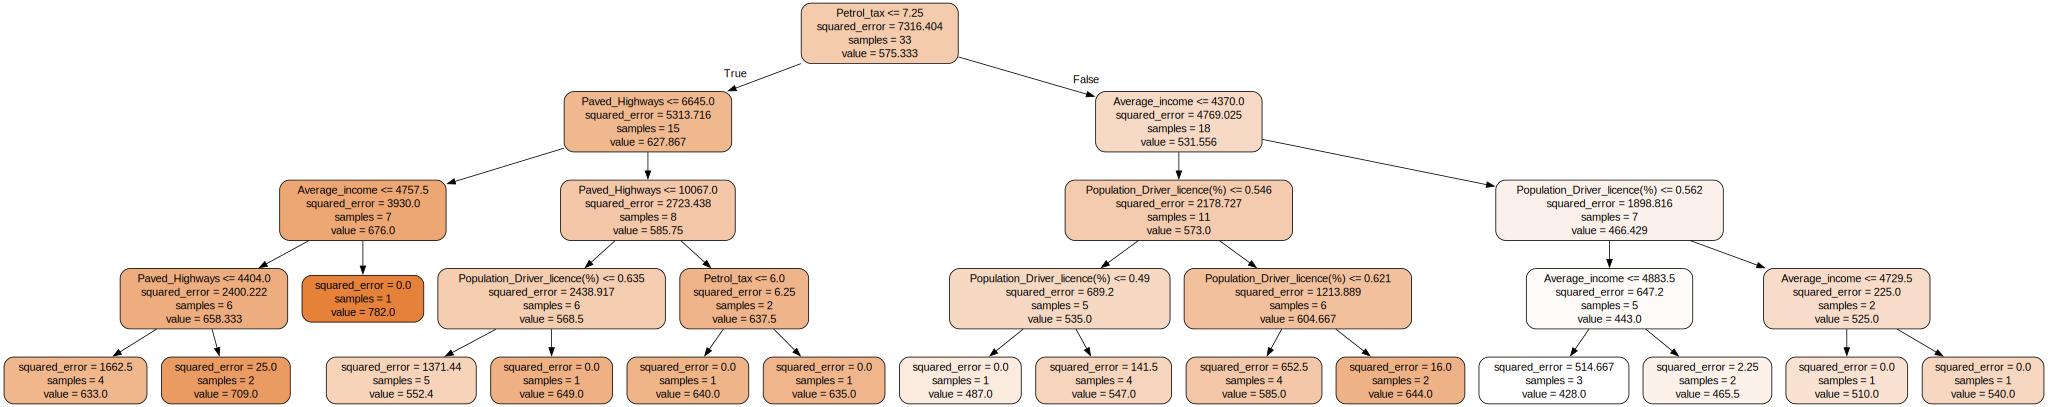

In [168]:
import graphviz
# plt.figure(figsize=(8,5))
graphviz.Source(dot_data)


#### Using Gridsearch & Cross Validation appropriately.

##### Now I will use grid search cv to find the optimal value of hyper_parameters to plot the Decision Tree

In [169]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"max_depth":[3,4,5, None], "max_features":[3,4,5,6,7]}]

In [170]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),param_grid = param_grid,cv=10)

In [171]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [172]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [173]:
gs.cv_results_['rank_test_score']

array([ 6,  1,  1,  1,  1,  5,  9,  9,  9,  9,  7, 13, 13, 13, 13,  8, 17,
       17, 17, 17], dtype=int32)

In [174]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=4, random_state=123)

In [175]:
tree = DecisionTreeRegressor(max_depth=3,max_features=4)

tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features=4)

In [176]:
predictions = tree.predict(X_test)

In [177]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5) #Check the top 5 predictions and actual values.

,Actual,Predicted
18,865,658.333333
13,508,658.333333
26,577,604.666667
31,554,658.333333
10,580,443.000000


In [178]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 96.6
Mean Squared Error: 15143.737037037035
Root Mean Squared Error: 123.05989207307569
r2_score: 0.3448182493161691


In [179]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X.columns, out_file=None)

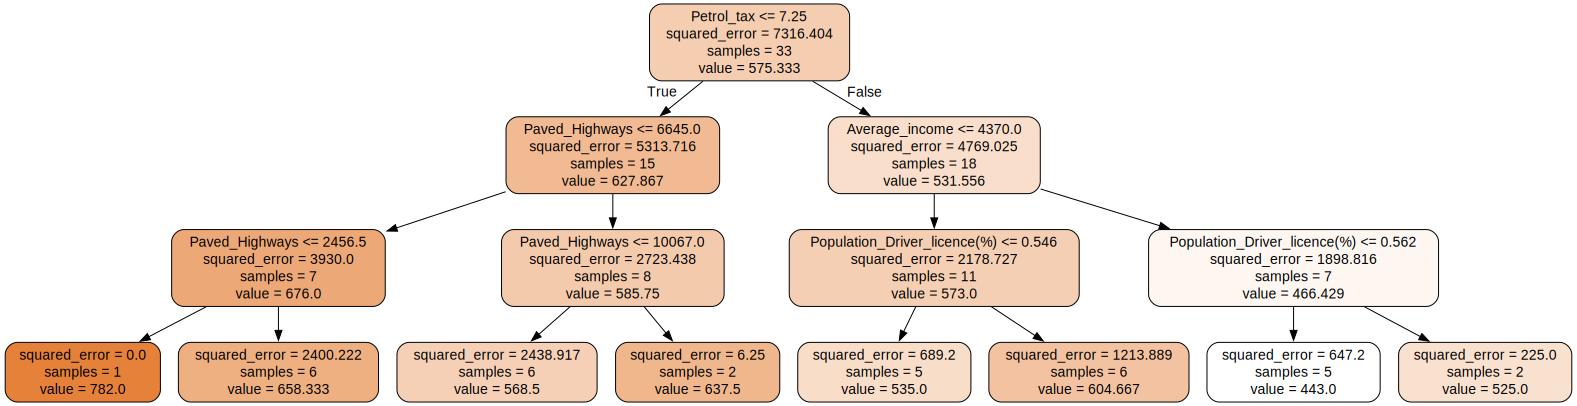

In [180]:
import graphviz

graphviz.Source(dot_data)

##### The Comparision Of Decision Tree without Applying GridSearch and One by applying with GridSearch

In [181]:
DT_Regressor=[['Max_Depth',4,3],['Max_Feature',4,4],['Mean Abs. Error',106.73,96.6],['Mean Square Error',18466.34,15143.73],['Root Mean Square',135.89,123.05],['r2_Score',0.20,0.344]]
Result_Summary2= pd.DataFrame(DT_Regressor, columns = ['Parameters','Without Grid Search','With Grid Search'])
Result_Summary2

,Parameters,Without Grid Search,With Grid Search
0,Max_Depth,4.00,3.000
1,Max_Feature,4.00,4.000
2,Mean Abs. Error,106.73,96.600
3,Mean Square Error,18466.34,15143.730
4,Root Mean Square,135.89,123.050
5,r2_Score,0.20,0.344


From the above comparision Dataframe we can see how Using GridSearch has affected the end result of Decision Tree Model. The Accuracy scores has also increased after substituting the optimum hyperparameters value. The MSE has reduced.